# Explore the outcome of a hyperparameter sweep for metric correlation between datasets

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys

pd.options.display.max_colwidth = None
MODULE_PATH =  Path(os.getcwd()).parents[1].resolve()

In [2]:
%cd {MODULE_PATH}

/home/shaul/workspace/GitHub/SOTA


In [63]:
path_combined = 'combined_dataset.csv'
path_sts = 'sts.csv'
path_qqp = 'qqp.csv'
path_sample_qqp = 'sample_qqp.csv'
report_file = "wandb_sweeping_ivanfeatures.csv"

PATH_DATA = MODULE_PATH / 'data'
PATH_COMBINED = PATH_DATA / 'datasets' / path_combined
PATH_STS = PATH_DATA / 'datasets' / path_sts
PATH_SAMPLE_QQP = PATH_DATA / 'datasets' / path_sample_qqp

In [64]:
df = pd.read_csv(PATH_DATA / 'reports' / report_file, index_col="Name")

In [65]:
df['RF Increase'] = df['RF PearsonR'] - df['Base Top Correlation']
df['RF Increase Percentage'] = df['RF Increase'] / df['Base Top Correlation']

## Find the cases where the RF Increase is the highest

In [66]:
train_dataset = path_sts
test_dataset = path_combined
filtered = False

if filtered:
    display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'] == test_dataset) & (~df['bad_annotators'].isnull())] \
    .sort_values(by="RF Increase",ascending=False)[:3])
else:
    display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'] == test_dataset) & (df['bad_annotators'].isnull())] \
    .sort_values(by="RF Increase",ascending=False)[:3])

,bad_annotators,rf_depth,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,
good-snowflake-57,NaN,6,False,False,combined_dataset.csv,sts.csv,0.484469,0.470838,-0.013631,-0.028136
fresh-lion-48,NaN,7,True,False,combined_dataset.csv,sts.csv,0.484469,0.470503,-0.013965,-0.028826
avid-haze-58,NaN,7,False,False,combined_dataset.csv,sts.csv,0.484469,0.470059,-0.014409,-0.029743


## Visualize how the RF changes overall

In [67]:
# We need to get rid of cases where you reduce labels - because they only hurt performace
df = df[df['scale_labels'] == False]

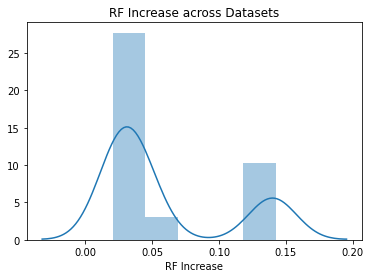

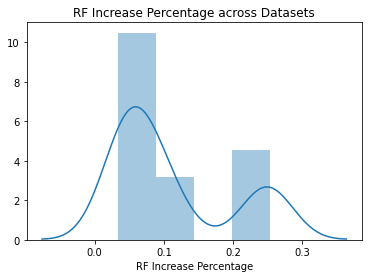

In [68]:
sns.distplot(df[(df['train_dataset'] != df['test_dataset']) & (df['test_dataset'].isna())]['RF Increase']);
plt.title("RF Increase across Datasets")
plt.show()
sns.distplot(df[(df['train_dataset'] != df['test_dataset']) & (df['test_dataset'].isna())]['RF Increase Percentage']);
plt.title("RF Increase Percentage across Datasets")
plt.show();

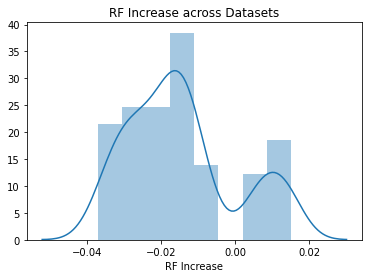

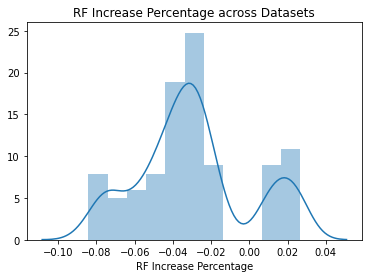

In [69]:
sns.distplot(df[(df['train_dataset'] != df['test_dataset']) & (~df['test_dataset'].isna())]['RF Increase']);
plt.title("RF Increase across Datasets")
plt.show()
sns.distplot(df[(df['train_dataset'] != df['test_dataset']) & (~df['test_dataset'].isna())]['RF Increase Percentage']);
plt.title("RF Increase Percentage across Datasets")
plt.show();

In [55]:
idx = df[df['train_dataset'] != df['test_dataset']]['RF Increase'].sort_values(ascending=True)[:5].index
display(df.laoc[idx])

,State,Notes,User,Tags,Created,Runtime,Sweep,bad_annotators,rf_depth,rf_top_n_features,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,,,,,,,,,
olive-glade-569,finished,-,sota-mafat,NaN,2020-11-23T18:19:10.000Z,28,NaN,NaN,9,4,True,False,sts.csv,combined_dataset.csv,0.705798,0.554448,-0.151350,-0.214438
fallen-glade-598,finished,-,sota-mafat,NaN,2020-11-23T18:29:30.000Z,19,NaN,NaN,9,3,False,False,sts.csv,combined_dataset.csv,0.705798,0.556554,-0.149244,-0.211454
gentle-pond-568,finished,-,sota-mafat,NaN,2020-11-23T18:18:41.000Z,26,NaN,NaN,9,3,True,False,sts.csv,combined_dataset.csv,0.705798,0.558087,-0.147711,-0.209282
youthful-oath-599,finished,-,sota-mafat,NaN,2020-11-23T18:29:53.000Z,20,NaN,NaN,9,4,False,False,sts.csv,combined_dataset.csv,0.705798,0.558864,-0.146934,-0.208181
pleasant-frost-567,finished,-,sota-mafat,NaN,2020-11-23T18:18:11.000Z,27,NaN,NaN,8,5,True,False,sts.csv,combined_dataset.csv,0.705798,0.559754,-0.146044,-0.206920


In [56]:
df.groupby("")

,State,Notes,User,Tags,Created,Runtime,Sweep,bad_annotators,rf_depth,rf_top_n_features,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,,,,,,,,,
dauntless-hill-583,finished,-,sota-mafat,NaN,2020-11-23T18:24:32.000Z,18,NaN,NaN,9,3,False,True,sts.csv,combined_dataset.csv,0.549603,0.415853,-0.133750,-0.243358
zesty-leaf-553,finished,-,sota-mafat,NaN,2020-11-23T18:13:02.000Z,19,NaN,NaN,9,3,True,True,sts.csv,combined_dataset.csv,0.549603,0.418668,-0.130935,-0.238236
worthy-star-585,finished,-,sota-mafat,NaN,2020-11-23T18:25:18.000Z,22,NaN,NaN,9,5,False,True,sts.csv,combined_dataset.csv,0.549603,0.420948,-0.128655,-0.234087
eager-mountain-554,finished,-,sota-mafat,NaN,2020-11-23T18:13:27.000Z,23,NaN,NaN,9,4,True,True,sts.csv,combined_dataset.csv,0.549603,0.421408,-0.128195,-0.233250
rich-river-550,finished,-,sota-mafat,NaN,2020-11-23T18:11:51.000Z,18,NaN,NaN,8,3,True,True,sts.csv,combined_dataset.csv,0.549603,0.422949,-0.126654,-0.230447


## Exploring some SHAP

In [99]:
from src import model_corr
import shap
from sklearn.ensemble import RandomForestRegressor

In [103]:
shap.initjs()

In [111]:
metrics = ['bleu', 
           'bleu1',
           'glove_cosine',
           'fasttext_cosine',
           'BertScore',
           'chrfScore',
           'POS Dist score',
           '1-gram_overlap',
           'ROUGE-1',
           'ROUGE-2',
           'ROUGE-l',
           'L2_score',
           'WMD']

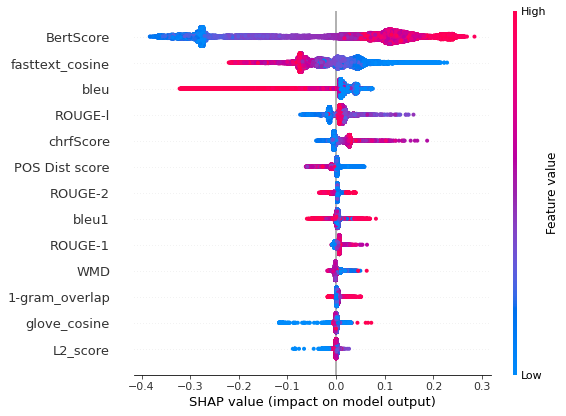

In [119]:
df = pd.read_csv(PATH_SAMPLE_QQP)
df.dropna(inplace=True)
model = RandomForestRegressor(max_depth=6)
model.fit(df[metrics], df['label'])

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df[metrics])

shap.summary_plot(shap_values, df[metrics])